In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

In [ ]:
(x_train,y_train),(x_valid,y_valid)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

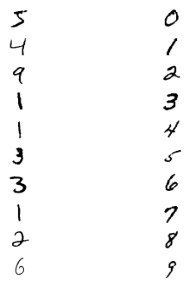

In [ ]:
plt.figure(figsize=(5,5))
for k in range(20):
  plt.subplot(10,2,k+1)
  plt.imshow(x_train[k],cmap='Greys')
  plt.axis('off')
plt.show()

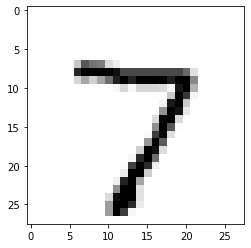

In [ ]:
plt.imshow(x_valid[0],cmap='Greys')

In [ ]:
x_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

preprocess data

In [ ]:
x_train = x_train.reshape(60000,784).astype('float32')
x_valid = x_valid.reshape(10000,784).astype('float32')

In [ ]:
x_train/=255
x_valid/=255

In [ ]:
x_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
from keras import utils as np_utils
n_classes=10
y_train=keras.utils.np_utils.to_categorical(y_train,n_classes)
y_valid=keras.utils.np_utils.to_categorical(y_valid,n_classes)

In [ ]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
x_valid[3]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model=Sequential()

neurons in dense layers receive output from neurons of previous layer

In [ ]:
model.add(Dense(64, activation='sigmoid',input_shape=(784,)))

In [ ]:
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=125,epochs=75,verbose=1)

Epoch 1/100
600/600 [==============================] - 3s 4ms/step - loss: 0.0564 - accuracy: 0.6581
Epoch 2/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0558 - accuracy: 0.6628
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0553 - accuracy: 0.6675
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0548 - accuracy: 0.6720
Epoch 5/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0543 - accuracy: 0.6761
Epoch 6/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0538 - accuracy: 0.6809
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0533 - accuracy: 0.6844
Epoch 8/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0528 - accuracy: 0.6880
Epoch 9/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0523 - accuracy: 0.6927
Epoch 10/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0518 - accura

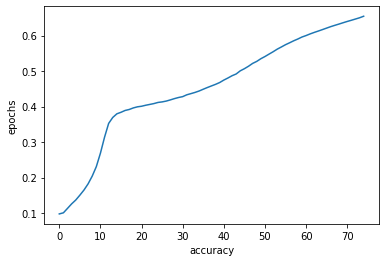

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('accuracy')
plt.ylabel('epochs')
plt.show()